# Life Expectancy & GDP

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

These are key questions that the project will seek to answer:
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the Data

Loaded the dataset into a dataframe so that it can be visualized.
Checked its contents using `.head()` to make sure data has been loaded properly.

In [8]:
master_df = pd.read_csv('all_data.csv')
print(master_df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## Exploring the Data
First, `.info()` checks the overall structure of the dataframe. It also confirms that there are no missing values in the dataframe.

In [17]:
print(master_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


`.shape()` shows that the dataframe has 96 rows (observations) and 4 columns.

In [19]:
print(master_df.shape)

(96, 4)


The following shows that there are six countries: Chile, China, Germany, Mexico, United States of America, Zimbabwe

In [20]:
print(master_df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Additionally, the following shows that the years represented in the data are between 2000 and 2015.

In [16]:
print(master_df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Cleaning Column Name

Looking at the given data, there are inconsistencies in column names. While all other columns are named with one word, the `Life expectancy at birth (years)` contains five. Although descriptive, keeping the name will be inconvenient when calling it to plot the data. The `rename` function can be used to change the column name to `Life_Expectancy`.

In [27]:
master_df.rename(columns={'Life expectancy at birth (years)':'Life_Expectancy'}, inplace=True)
print(master_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


## Exploratory Plots

Below is the distribution of `GDP`. The data is very right skewed, with most of its values on the left-hand side.

<Figure size 576x432 with 0 Axes>

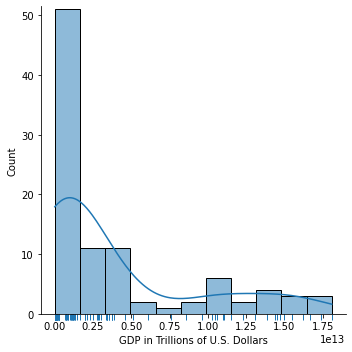

<Figure size 432x288 with 0 Axes>

In [248]:
plt.figure(figsize=(8,6))
sns.displot(data=master_df, x='GDP', kde=True)
sns.rugplot(data=master_df, x='GDP', height=-0.02, clip_on=False)
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.show()
plt.clf()

Next is the distribution of `Life_Expectancy`, which is very left skewed, with most of its values on the right-hand side. A further look may identify different modes or smaller groupings od distributions within the range.

<Figure size 576x432 with 0 Axes>

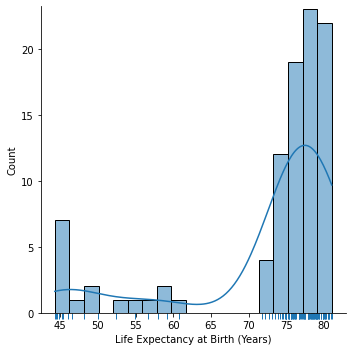

<Figure size 432x288 with 0 Axes>

In [244]:
plt.figure(figsize=(8,6))
sns.displot(data=master_df, x='Life_Expectancy', kde=True)
sns.rugplot(data=master_df, x='Life_Expectancy', height=-0.02, clip_on=False)
plt.xlabel('Life Expectancy at Birth (Years)')
plt.show()
plt.clf()

Previous plots did not break up the data by countries. The following code finds the average (mean) value of `Life_Expectancy` and `GDP` by country.

In [249]:
country_means = master_df.drop('Year', axis=1).groupby('Country').mean().reset_index()
print(country_means)

                    Country  Life_Expectancy           GDP
0                     Chile         78.94375  1.697888e+11
1                     China         74.26250  4.957714e+12
2                   Germany         79.65625  3.094776e+12
3                    Mexico         75.71875  9.766506e+11
4  United States of America         78.06250  1.407500e+13
5                  Zimbabwe         50.09375  9.062580e+09


Since the data has now been broken down by `Country` with mean values for `Life_Expectancy` and `GDP` calculated, barplots can be created to compare the average values by country.

The mean `Life_Expectancy` by `Country` plot shows that all countries except Zimbabwe have values in the mid-to-high 70s. This helps to explain the skew that was shown in the distribution plots previously.

The mean `GDP` by `Country` plot shows that the US has a much higher value compared to the rest of the countries. Zimbabwe's mean GDP is not visible and Chile's mean GDP is barely visible. Since the mean GDP by country display disparities while mean Life Expectancy does not, further exploration with individual countries may provide deeper insight into the relationship between Life Expectancy and GDP.

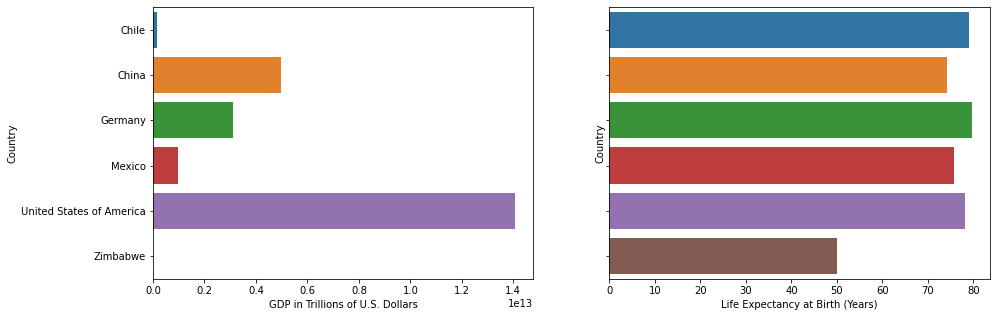

<Figure size 432x288 with 0 Axes>

In [250]:
# plt.figure()
# sns.barplot(x='Life_Expectancy', y='Country', data=country_means)
# plt.show()
# plt.clf()

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))

axes[0] = sns.barplot(ax=axes[0], x=country_means.GDP, y=country_means.Country)
axes[0].set_xlabel('GDP in Trillions of U.S. Dollars')
axes[1] = sns.barplot(ax=axes[1], x=country_means.Life_Expectancy, y=country_means.Country)
axes[1].set_xlabel('Life Expectancy at Birth (Years)')

plt.show()
plt.clf()

Violin plots show the shape of the distribution, which the box plot is incapable of doing.

The violin plots below have countries on the x-axis and `GDP` and `Life_Expectancy` on the y-axis.

The `GDP` plot on the left shows that Chine and the US have relatively wide ranges, while the `Life_Expectancy` plot on the right show that most countries except Zimbabwe have shorter ranges.

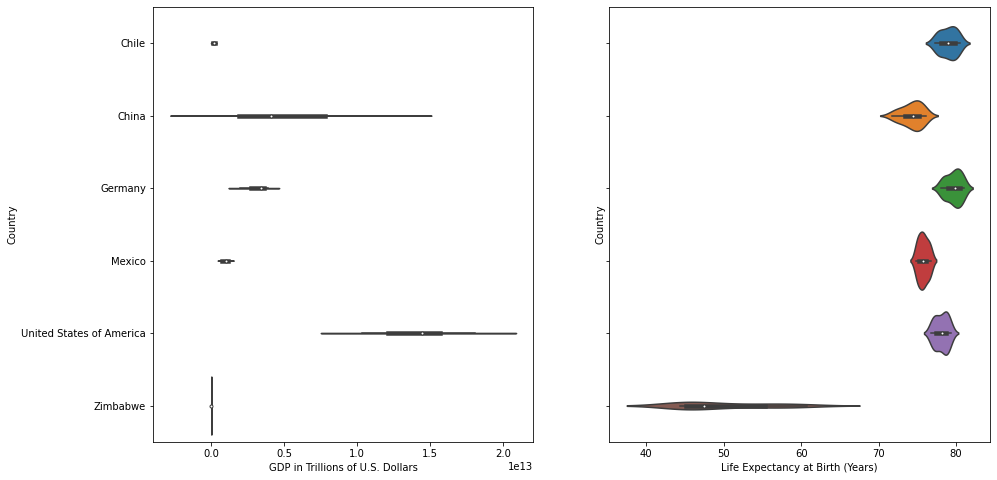

<Figure size 432x288 with 0 Axes>

In [251]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,8))

axes[0] = sns.violinplot(ax=axes[0], x=master_df.GDP, y=master_df.Country)
axes[0].set_xlabel('GDP in Trillions of U.S. Dollars')
axes[1] = sns.violinplot(ax=axes[1], x=master_df.Life_Expectancy, y=master_df.Country)
axes[1].set_xlabel('Life Expectancy at Birth (Years)')

plt.show()
plt.clf()

Overlaying swarm plots to the violin plots above provide a better visualization for understanding the distribution of the data. They are useful in displaying the density around certain values.

In the `GDP` plot on the left, this feature of the swarm plot is proven to be useful, as there are visible verticle lines for Chile and Zimbabwe, showing the number/density of values that would have otherwise been lost in a typical violin plot.

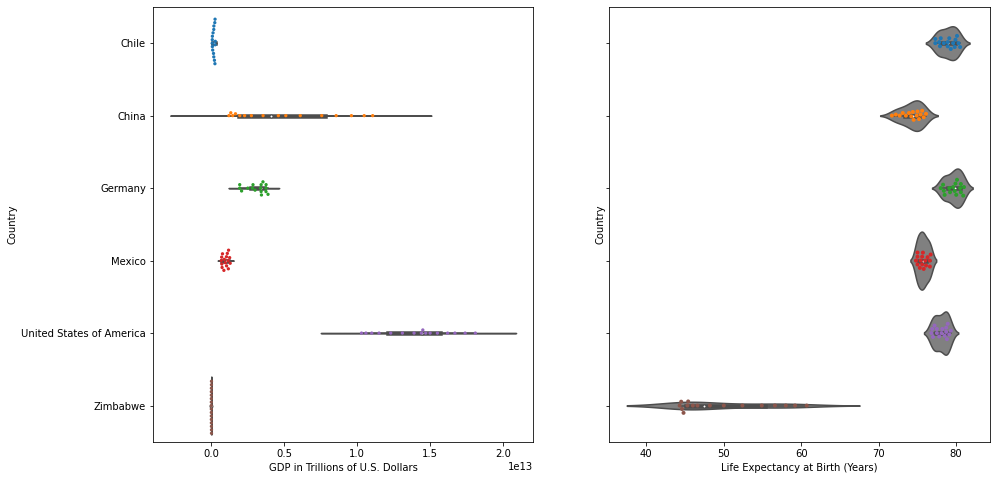

<Figure size 432x288 with 0 Axes>

In [223]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,8))

axes[0] = sns.violinplot(ax=axes[0], x=master_df.GDP, y=master_df.Country, color='Gray')
axes[0] = sns.swarmplot(ax=axes[0], x=master_df.GDP, y=master_df.Country, size=3.3)
axes[0].set_xlabel('GDP in Trillions of U.S. Dollars')
axes[1] = sns.violinplot(ax=axes[1], x=master_df.Life_Expectancy, y=master_df.Country, color='Gray')
axes[1] = sns.swarmplot(ax=axes[1], x=master_df.Life_Expectancy, y=master_df.Country, size=4)
axes[1].set_xlabel('Life Expectancy at Birth (Years)')

plt.show()
plt.clf()

### Line Chart (GDP)

Next `GDP` and `Life_Expectancy` over the years will be explored through line charts.

Below, the `GDP` plot shows the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

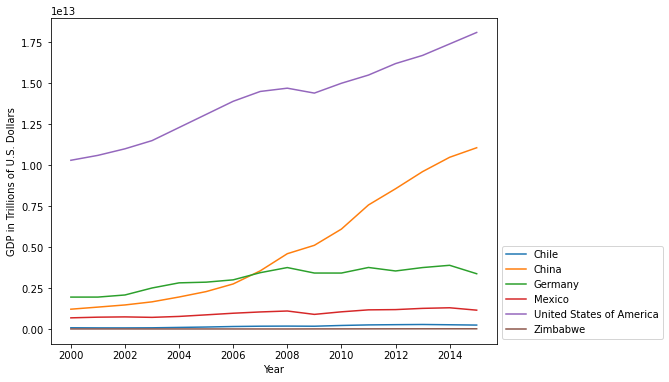

In [252]:
plt.figure(figsize=(8,6))
sns.lineplot(x=master_df.Year, y=master_df.GDP, hue=master_df.Country)
plt.legend(loc='lower left', bbox_to_anchor=(1,0), ncol=1)
plt.ylabel('GDP in Trillions of U.S. Dollars')

### Faceted Line Charts (GDP)

According to the line chart above, countries other than the US and China seems to have had minimal to no growth over the years. However, by faceting the line charts by country as shown below, it is clear that all countries experienced growth in GDP between 2000 and 2015.

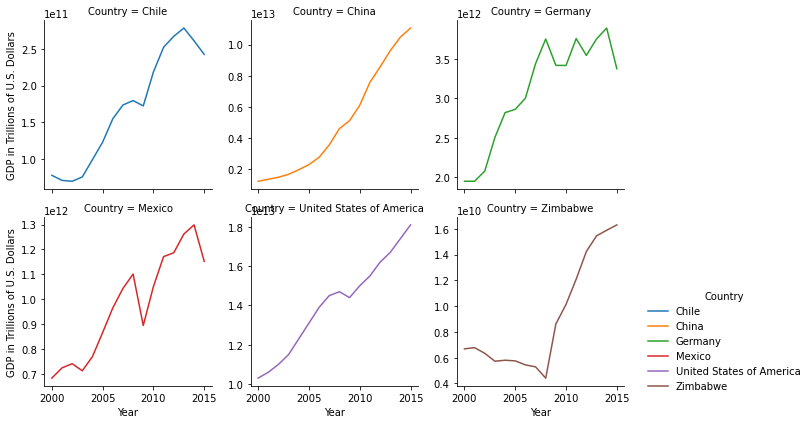

In [180]:
graphLE = sns.FacetGrid(master_df, col='Country', col_wrap=3, hue='Country', sharey=False)
graphLE = (graphLE.map(sns.lineplot, 'Year', 'GDP')).add_legend(loc='center right', bbox_to_anchor=(1.02,0.2), ncol=1).set_axis_labels('Year', 'GDP in Trillions of U.S. Dollars')

### Line Chart (Life Expectancy)

The chart below shows now looks at life expectancy over the years. The chart shows that every country has been increasing their life expectancy, but Zimbabwe has seen the greatest increase after a bit of a dip around 2004.

Text(0, 0.5, 'Life Expectancy at Birth (Years)')

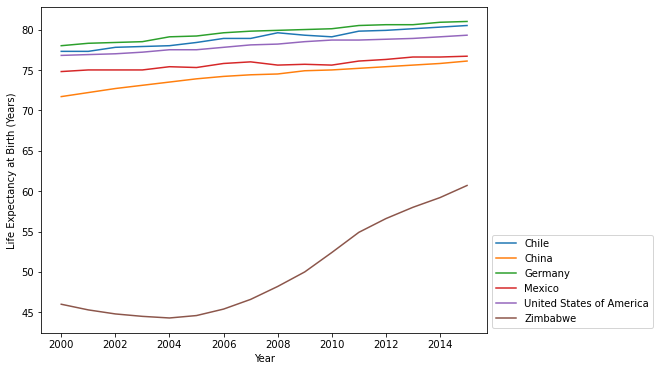

In [175]:
plt.figure(figsize=(8,6))
sns.lineplot(x=master_df.Year, y=master_df.Life_Expectancy, hue=master_df.Country)
plt.legend(loc='lower left', bbox_to_anchor=(1,0), ncol=1)
plt.ylabel('Life Expectancy at Birth (Years)')

### Faceted Line Charts (Life Expectancy)

Much like the GDP breakdown by country, the faceted plots below proves to be more useful than the line chart above which was unable to highlight the growth for each country that can be seen in the charts below.

It can be seen that some countries such as China experienced a steady linear growth while growth in countries such as Chile and Mexico experienced dips and were not as smooth.

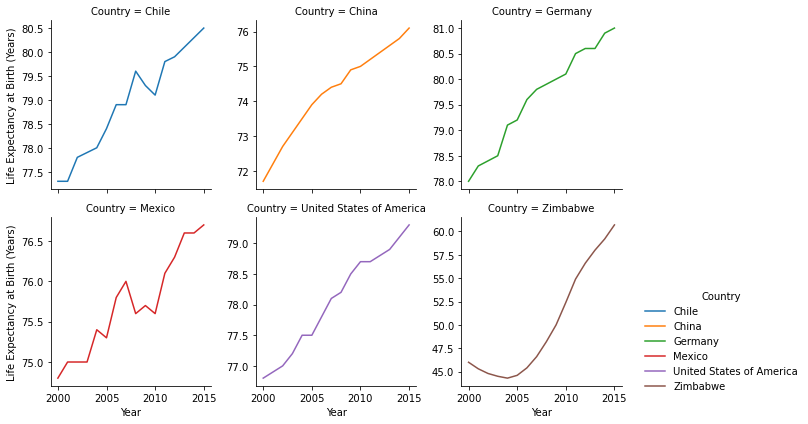

In [177]:
graphLE = sns.FacetGrid(master_df, col='Country', col_wrap=3, hue='Country', sharey=False)
graphLE = (graphLE.map(sns.lineplot, 'Year', 'Life_Expectancy')).add_legend(loc='center right', bbox_to_anchor=(1.02,0.2), ncol=1).set_axis_labels('Year', 'Life Expectancy at Birth (Years)')

### Regression Model (GDP vs. Life Expectancy)

The next chart explores the relationship between `GDP` and `Life_Expectancy`.

This lmplot below is broken up by country and captures the regression model displaying the relationship between `GDP` and `Life_Expectancy` in each.

Accoring to the chart below, it looks like the previous charts where GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

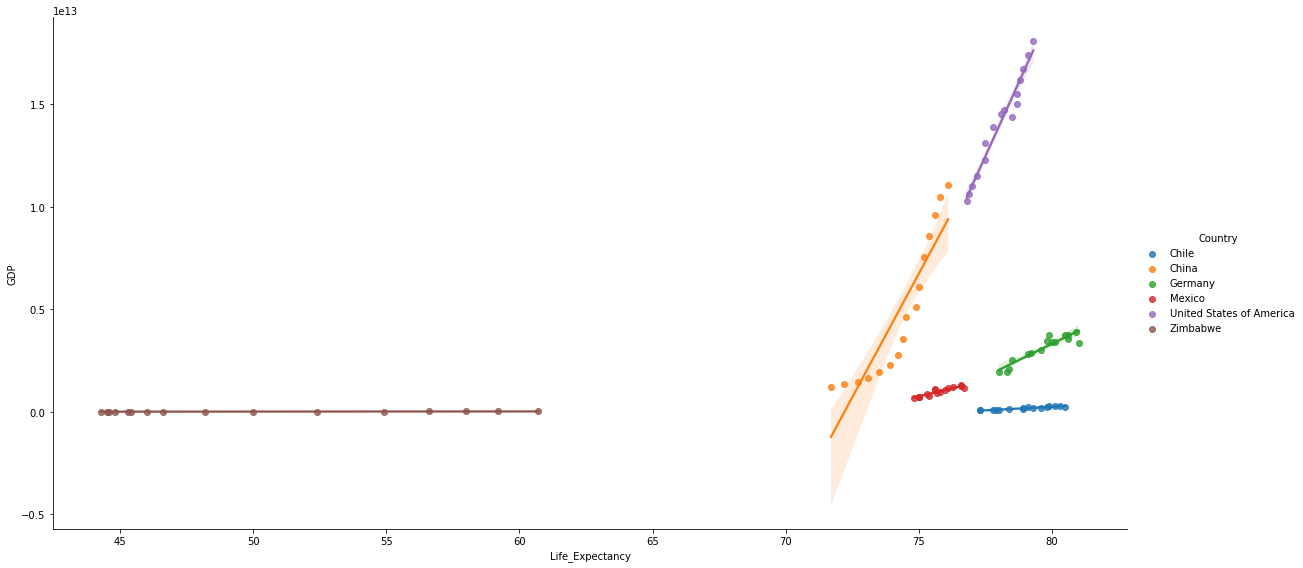

<Figure size 432x288 with 0 Axes>

In [253]:
sns.lmplot(x='Life_Expectancy', y='GDP', hue='Country', data=master_df, legend=True, height=8, aspect=2)
plt.show()
plt.clf()

Like the previous plots, countries are broken out into each scatter plot by facets. Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.

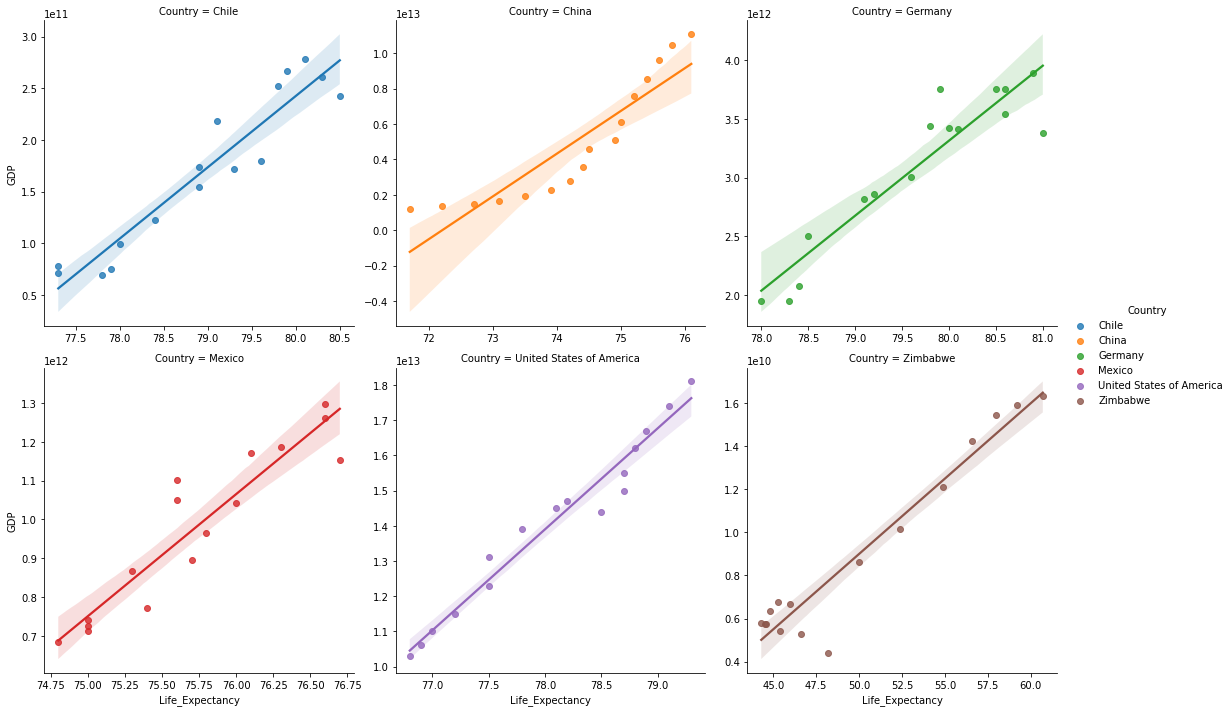

<Figure size 432x288 with 0 Axes>

In [254]:
sns.lmplot(x='Life_Expectancy', y='GDP', col='Country', hue='Country', data=master_df, col_wrap=3, facet_kws=dict(sharey=False, sharex=False)).add_legend()
plt.show()
plt.clf()

## Conclusions

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - The life expectancy had a left skew, or most of the observations were on the right side.